##Implementation of Single-layer Perceptron

Let’s build a simple single-layer perceptron to recognize handwritten digits from the MNIST dataset using TensorFlow. This model will help you understand how neural networks work at the most basic level.

##Step1: Import necessary libraries
Numpy - Numpy arrays are very fast and can perform large computations in a very short time.

Matplotlib - This library is used to draw visualizations.

TensorFlow - This is an open-source library that is used for Machine Learning and Artificial intelligence and provides a range of functions to achieve complex functionalities with single lines of code.

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

##Step 2: Load the Dataset
Now we load the dataset using "Keras" from the imported version of tensor flow.

In [8]:
(x_train, y_train),\
    (x_test, y_test) = keras.datasets.mnist.load_data()

Now display the shape and image of the single image in the dataset. The image size contains a 28*28 matrix and length of the training set is 60,000 and the testing set is 10,000. Each image is 28x28 pixels.

The pixel values range from 0 (black) to 255 (white).
matshow() displays the image in a grid format.

60000
10000
(28, 28)


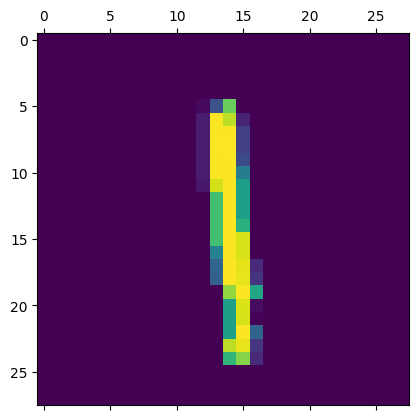

In [10]:
print(len(x_train))
print(len(x_test))
print(x_train[0].shape) #displays the image size - 28 x 28 pixels
plt.matshow(x_train[8]) #showing in gray scale

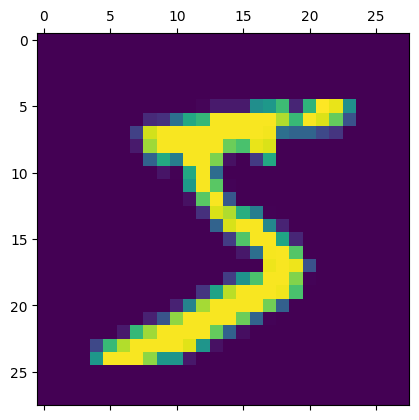

In [11]:
x_train[0].shape
plt.matshow(x_train[0])

##Step 3: Normalize the Dataset
Now normalize the dataset in order to compute the calculations in a fast and accurate manner. Normalization helps the model train faster and improves accuracy. Neural networks expect input in a 1D format so we flatten the 2D 28x28 images into 784-length vectors.

In [12]:
x_train = x_train/255 #normalising image to 0 to 1 range
x_test = x_test/255 #normalising image to 0 to 1 range

# Flattening the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28) #any dimension image is converted to 1D vector. Here 28 x 28 is converted to vector of 748 elements
x_test_flatten = x_test.reshape(len(x_test), 28*28)

##Step 4: Building a neural network
Now we will build neural network with single-layer perception. Here we can observe as the model is a single-layer perceptron that only contains one input layer and one output layer there is no presence of the hidden layers.

10 output neurons (one for each digit from 0 to 9).
input_shape=(784) matches the flattened image shape.
We use sigmoid activation which outputs probabilities between 0 and 1 for each digit class.

In [13]:
model = keras.Sequential([ #creating a linear stack of layers
    keras.layers.Dense(10, input_shape=(784,), # 10 output neurons
                       activation='sigmoid')
])
model.compile(
    optimizer='adam', #learning rate will be adjusted
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5) #X_train_flatten- 748 elemneted vector,, y_train is the labels

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8176 - loss: 0.7136
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9137 - loss: 0.3107
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9199 - loss: 0.2862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.2755
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.2650


##Step 5: Model Evaluation
After training we test the model's performance on unseen data. This gives the loss and accuracy on the test dataset.

In [ ]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9148 - loss: 0.3011


[0.26756805181503296, 0.925599992275238]